
<a href="https://colab.research.google.com/github/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Байесовская регрессия

Пусть дана обучающая выборка $\mathcal{D}$, состоящая из $N$ элементов, которая получена следующим образом: 

$$
y_i = w_0 + x_i w_1 + N(0, \sigma^2).
$$

Пусть априорное распределение для каждого из весов является нормальным. 

1. Получите вид апостериорного распределения $p(w| \mathcal{D})$.
2. Рассмотрите как меняется апостериорное распреление весов в зависимости *от числа объектов*, которые мы используем для обучения модели. 
- Получите параметры этого распределения. 
- Постройте плотности распределения весов. 
- Просемлируйте несколько значений весов из полученного апостериорного распределения и постройте предсказания (линии регересии на некотором интервале).
3. Как ведут себя полученные линии при добавлении новых данных. Какие выводы можно сделать. 

1. 

w_0 = -1/2 * -2 sum(y_i) (i = 0...N) /b^2 + -1/2 * 2m/d^2

w_1 = -1/2 * -2 sum(y_i) (i = 0...N) sum(x_i) (i = 0...N) /b^2 + -1/2 * 2m/d^2

w_0*w_1 = -1/2 * 2 sum(x_i) (i = 0...N)/b^2

/// подсчеты ////

мы доказали соответствие с нормальным распределением, из чего делаем вывод, что

p(w|D) = 1/(pi * q_1 * q_2 * sqrt(1 - p^2)) exp(-1/2(1 - p^2) * [(x_1 - m_1)^2/q_1^2 - p* (2 (x_1-m_1)(x_2-m_2)/(q_1 * q_2)) + (x_2-m_2)^2/q_2^2])

In [170]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [172]:
np.random.seed(42)
true_weight = np.array([[4], [1]])
N = 100
X = np.random.normal(size = (N, 2))
X[:, 0] = 1
X[:10]

array([[ 1.        , -0.1382643 ],
       [ 1.        ,  1.52302986],
       [ 1.        , -0.23413696],
       [ 1.        ,  0.76743473],
       [ 1.        ,  0.54256004],
       [ 1.        , -0.46572975],
       [ 1.        , -1.91328024],
       [ 1.        , -0.56228753],
       [ 1.        ,  0.31424733],
       [ 1.        , -1.4123037 ]])

In [173]:
noize_sigma = 1
y = X@true_weight
y += np.random.normal(size = y.shape, scale = noize_sigma)
y[:5]

array([[4.21952306],
       [6.08381438],
       [4.84891429],
       [5.82123678],
       [3.16489068]])

In [174]:
weight_sigma = 1
weight_sigma_matrix = np.array(np.eye(2)*(weight_sigma**2))
m = 0

In [175]:
# w_0**2
xi_1 = - 1/(2*weight_sigma**2)*N - 1/(2*noize_sigma**2) 
xi_1

-50.5

In [176]:
x = X[:, 1]
x

array([-0.1382643 ,  1.52302986, -0.23413696,  0.76743473,  0.54256004,
       -0.46572975, -1.91328024, -0.56228753,  0.31424733, -1.4123037 ,
       -0.2257763 , -1.42474819,  0.11092259,  0.37569802, -0.29169375,
        1.85227818, -1.05771093, -1.22084365, -1.95967012,  0.19686124,
        0.17136828, -0.3011037 , -0.71984421,  1.05712223, -1.76304016,
       -0.38508228,  0.61167629,  0.93128012, -0.30921238,  0.97554513,
       -0.18565898, -1.19620662,  1.35624003,  1.0035329 , -0.64511975,
        1.53803657,  1.56464366,  0.8219025 , -0.29900735, -1.98756891,
        0.35711257, -0.51827022, -0.50175704,  0.32875111,  0.51326743,
        0.96864499, -0.32766215, -1.46351495,  0.26105527, -0.23458713,
       -0.42064532, -0.80227727,  0.40405086,  0.17457781, -0.07444592,
       -0.02651388,  2.46324211,  0.30154734, -1.16867804,  0.75193303,
       -0.90938745, -1.40185106,  2.19045563, -0.56629773, -0.50347565,
        0.06856297,  0.47359243,  1.54993441, -0.32206152, -1.23

In [177]:
# w_1**2
xi_2 = - 1/(2*(weight_sigma**2))*(x**2).sum() - 1/(2*(noize_sigma**2))
xi_2

-49.94493758187462

In [178]:
X

array([[ 1.        , -0.1382643 ],
       [ 1.        ,  1.52302986],
       [ 1.        , -0.23413696],
       [ 1.        ,  0.76743473],
       [ 1.        ,  0.54256004],
       [ 1.        , -0.46572975],
       [ 1.        , -1.91328024],
       [ 1.        , -0.56228753],
       [ 1.        ,  0.31424733],
       [ 1.        , -1.4123037 ],
       [ 1.        , -0.2257763 ],
       [ 1.        , -1.42474819],
       [ 1.        ,  0.11092259],
       [ 1.        ,  0.37569802],
       [ 1.        , -0.29169375],
       [ 1.        ,  1.85227818],
       [ 1.        , -1.05771093],
       [ 1.        , -1.22084365],
       [ 1.        , -1.95967012],
       [ 1.        ,  0.19686124],
       [ 1.        ,  0.17136828],
       [ 1.        , -0.3011037 ],
       [ 1.        , -0.71984421],
       [ 1.        ,  1.05712223],
       [ 1.        , -1.76304016],
       [ 1.        , -0.38508228],
       [ 1.        ,  0.61167629],
       [ 1.        ,  0.93128012],
       [ 1.        ,

In [179]:
weight_sigma, noize_sigma

(1, 1)

In [180]:
# w_0*w_1
xi_3 = -1/2 * 2*x.sum()/(weight_sigma**2)
xi_3

-3.402232444421978

In [181]:
# w_0
xi_4 = -1/2 * -2*y.sum()/(weight_sigma**2) + -1/2 * 2*m/(noize_sigma**2)
xi_4

409.89185775446674

In [182]:
# w_1
xi_5 = -1/2 * -2*x.dot(y)/(weight_sigma**2) + -1/2 * 2*m/(noize_sigma**2)
xi_5

array([96.23840845])

In [183]:
p = xi_3/(2* (xi_1 * xi_2)**(0.5))
p

-0.03387213407310486

In [184]:
# sigma 1
b_1 = 1/((-xi_1*2*(1-p**2))**(0.5))
b_1

0.09956084956244725

In [185]:
# sigma 2
b_2 = 1/((-xi_2*2*(1-p**2))**(0.5))
b_2

0.10011255506201089

In [186]:
p

-0.03387213407310486

In [187]:
a = -1/(2*(1-p*p)*b_1*b_1)
a

-50.50000000000001

In [188]:
b = -1 / (2 * (1-p**2)) * 1 / (b_2**2)
b

-49.94493758187462

In [189]:
c = xi_3
c

-3.402232444421978

In [190]:
m_1 = (- xi_3 * xi_5 + 2 * xi_2 * xi_4)/(-4 * xi_1 * xi_2 + xi_3 * xi_3)
m_1

array([4.03050541])

In [191]:
m_2 = (xi_4 + 2 * xi_1 * m_1)/(- xi_3)
m_2

array([0.82616674])

In [192]:
b_12 = p * b_1 * b_2

In [193]:
SIGMA = np.array([[b_1 * b_1, b_12],
          [b_12, b_2 * b_2]])
MU = [m_1, m_2]

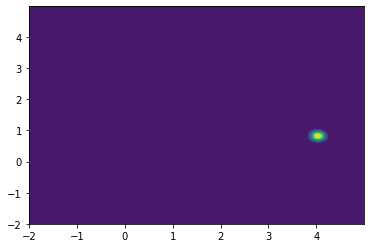

In [194]:
#  MU - массив из m_1 m_2 SIGMA - составленная матрица
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean=np.ravel(MU), cov=SIGMA)
x, y = np.mgrid[-2:5:.01, -2:5:.01]
pos = np.dstack((x, y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(x, y, rv.pdf(pos))

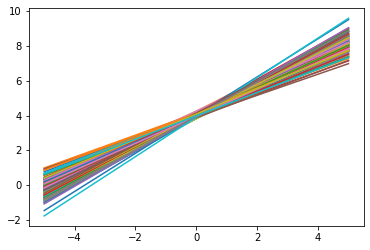

In [195]:
w = np.random.multivariate_normal(np.ravel(MU), SIGMA, 100)
x = np.linspace(-5, 5, 100)
for w0, w1 in w:
  y = w0 + x*w1
  plt.plot(x, y)